In [ ]:
import sys

import os
datapath = os.path.join("datasets", "lifesat", "")

In [ ]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# 데이터 다운로드
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))``


Saving 1.PNG to 1.PNG
User uploaded file "1.PNG" with length 54633 bytes


# CHP 1. 한눈에 보는 머신러닝

### 1.1 머신러닝 시스템
데이터에서부터 학습하도록 프로그래밍 하는 과학
- 훈련세트(훈련사례) 필요
- 성능 측정 : 정확도 

### 1.2 왜 머신러닝? 
- 전통적 방법 : 복잡한 규칙 패턴 직접 작성
- 머신러닝 : 자동학습으로 프로그램이 짧고 유지보수가 쉬움, 정확도가 높음, 자동화 가능

  -> 우리도 머신러닝 통해 알고리즘이 학습한 것 조사, 배울 수 있음

  -> 예상치 못한 연관 관계나 새로운 추세 발견, 해당 문제 이해를 도움

  -> 대용량 데이터 분석으로 안보이는 패턴 발견 : 데이터 마이닝 작업

### 1.4 머신러닝 시스템 종류 


#### 넓은 범주 분류 
- 지도, 비지도, 준지도, 강화 학습 : 사람의 감독 여부 
- 온라인, 배치 학습 : 실시간 점진적 학습 여부
- 사례 기반 학습, 모델 기반 학습 : 알고 있는 데이터와 새로운 데이터 포인트 비교, 패턴 발견 후 모델화

### 지도 학습

: 알고리즘에 주입하는 훈련 데이터에 레이블이 포함 됨

- 분류
ex) 스팸 필터

- 회귀 : 예측변수 특성을 사용한 타깃 수치 예측 
ex) 중고차 가격 예측, 로지스틱 회귀는 분류로 사용 가능

- K-최근접 이웃, 선형회귀, 로지스틱 회귀, SVM, DT, RT, 신경망

### 비지도 학습 
: 훈련 데이터에 레이블이 없음, 아무 도움 없이 학습
- 군집
- 시각화와 차원축소
- 연관 규칙 학습


**계층 군집**
- 블로그 방문자 - 비슷한 방문자들을 그룹으로 묵는 군집 알고리즘 
- 방문자 사이의 연결고리 찾아 **계층 군집**을 진행 - 작은 그룹으로 세분화 

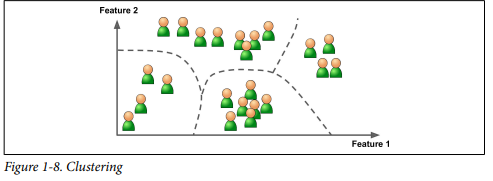

**시각화 알고리즘**

- 레이블이 없는 대규모의 고차원 데이터를 넣으면 도식화가 가능한 2D/3D로 표현
- 가능한 구조를 유지해 입력공간에서 떨어져 있는 클러스터는 시각화된 그래프에 겹치지 않게 유지, 데이터의 패턴 발견 가능 

**차원 축소**

- 너무 많은 정보를 잃지 않으면서 데이터를 간소화
- 상관관계가 있는 여러 특성 합침
- **특성 추출**이라 함

**이상치 탐지**

정상 샘플로 훈련 후 이상한 데이터 판단


### 준지도 학습
데이터에 레이블 다는 것 시간과 비용 많이 드는 문제

일부만 레이블이 있는 데이터 다룸


ex) 구글 포토 호스팅 서비스 - 사람 인식, 레이블 추가
지도 학습과 비지도 학습의 조합 



### 강화학습
다른 종류의 알고리즘
에이전트(학습 시스템)가 환경을 관찰해서 행동 실행, 결과로 보상 또는 벌점 받음
큰 보상을 얻기 위한 정책(전략) 스스로 학습 
ex) 알파고 프로그램


## 1.4.2 배치학습과 온라인 학습
(머신러닝 시스템 분류 기준)
" 입력 데이터의 스트림으로부터 점진적으로 학습할 수 있는지 여부!! "

**1. 배치 학습**<br>
시스템 점진적 학습 어려움<br>
가용한 데이터 모두 사용해 훈련 : 시간과 자원 많이 소모, 오프라인에서 수행<br>
시스템 훈련 후 제품 시스템에 적용, 더 이상의 학습 없이 실행, 학습한 것을 적용만 함 : 오프라인 학습<br>
- 새로운 데이터에 대해 학습하려면?<br>
    - 전체데이터를 처음부터 다시 학습, 새 시스템으로 교체 
    - 전체 데이터셋을 사용해 많은 컴퓨팅 자원 필요
    
    => 점진적으로 학습할 수 있는 알고리즘이 필요

**2. 점진적 학습**<br>
데이터를 순차적으로 한개씩,미니배치(묶음) 단위로 주입해 시스템 훈련<br>
매 학습 단계가 빠르고 비용이 적게 든다. <br>
- 데이터가 도착하는 대로 시스템이 즉시 학습 가능<br>
- 연속적으로 데이터를 받고 빠른 변화에 스스로 적응하는 시스템에 적합 <br>
공간 절약 <br>
- 컴퓨터 한 대의 메인 메모리에 들어 갈 수 없는 큰 데이터셋 학습 시에도 점진적 학습 알고리즘 사용(외부 메모리 학습)<br>
- 알고리즘이 데이터 일부 읽어들이고 훈련 단계를 수행 <br>
- 점진적 학습에서 중요한 파라미터 : 변화에 대한 학습률 (변화하는 데이터에 적응하는 빠르기) <br>
- 나쁜 데이터가 주입 됐을 때 시스템 성능이 점진적 감소 문제가 있음 -> 모니터링, 성능감소 감지시 즉각 학습 중지, 이상치 탐지 필요<br>




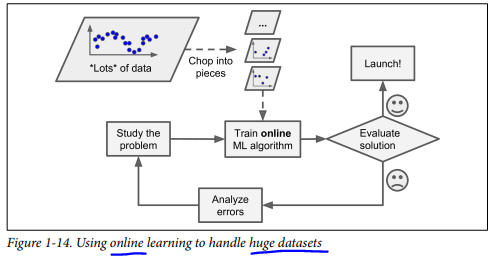


## 샘플을 일반화 시키는 방법 ?
## 1.4.3 사례기반 학습과 모델기반 학습<br>
(어떻게 일반화되는가에 따른 분류)<br>
머신러닝은 훈련데이터에서 새로운데이터의 좋은 예측을 일반화 해야함 <br>
목표는 훈련데이터가 아니라 새로운 샘플에 잘 작동하는 모델<br>

**1. 사례 기반 학습**<br>
유사한 메일 구분 필터 프로그래밍 - 유사도 측정<br>
두 메일 사이의 간단한 ***유사도 측정*** 방법 : 공통으로 포함한 단어의 수를 세는 것 <br>
시스템이 훈련 샘플을 기억함으로써 학습 & 유사도 측정을 사용해 새로운 데이터와 학습한 샘플을 비교하는 식으로 일반화<br>
새로운 샘플은 가장 비슷한 샘플 중 다수가 삼각형이므로 삼각형 클래스로 분류<br>

1. Instance-based learning


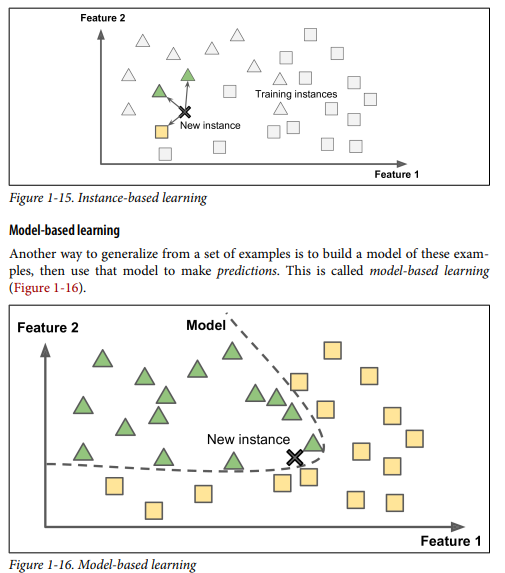

In [ ]:
print('1. Instance-based learning')

from IPython.display import Image
Image('1.PNG')

**2. 모델 기반 학습** <br>
샘플들의 모델을 만들어 예측에 사용하는 모델 기반 학습<br>
모델 선택, 선형모델, 모델 파라미터 조정해 모델 얻음<br>
모델이 최상의 성능을 내도록 하는 파라미터?<br>
효용함수(적합도 함수)를 정의하거나 비용함수(얼마나 나쁜지) 측정해 모델이 최상의 성능을 하도록 모델의 예측과 훈련데이터 사이의 거리를 최소화 함

모델의 종류나 완전히 정의된 모델구조나 예측에 사용하기 위해 준비된 훈련된 최종모델을 의미<br>
모델 훈련<br>
훈련데이터에 가장 잘 맞는 모델 파라미터를 찾기 위해 알고리즘을 실행하는 것<br>

1. 모델이 훈련데이터에 가능한 한 가깝게 맞춤 <br>
2. 모델을 사용해 예측<br>

EX) OECD 데이터에 없는 키프로스 사람들이 얼마나 행복한지 알아보기<br>
선형 모델을 사용해 예측 <br>


- 데이터를 로드하고 준비한 산점도를 그려 시각화

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# 이 함수는 OECD의 삶의 만족도(life satisfaction) 데이터와 IMF의 1인당 GDP(GDP per capita) 데이터를 합칩니다. 이는 번거로운 작업이고 머신러닝과는 관계가 없기 때문에 책 안에 포함시키지 않았습니다.

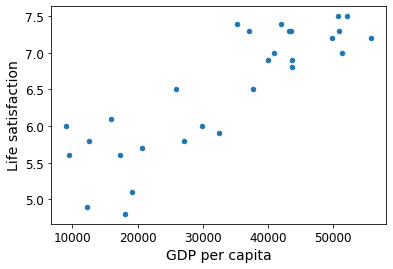

[[5.96242338]]


In [ ]:
# 예제 코드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

- 선형 모델을 훈련해 예측

In [ ]:
# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

[[5.96242338]]


In [ ]:
# 3-최근접 이웃 회귀 모델로 바꿉니다.
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델을 훈련합니다.
model1.fit(X,y)

# 키프로스에 대한 예측을 만듭니다.
print(model1.predict(X_new)) # 출력 [[5.76666667]]

[[5.76666667]]


In [ ]:
#노트북 출력을 동일하게 만들기 위해서
np.random.seed(42)

더 많은 특성을 사용하거나, 좋은 훈련 데이터, 강력한 모델 선택 필요

데이터 분석 - 모델 선택 - 훈련 데이터로 모델 훈련 - 새로운 데이터에 모델을 적용해 예측하고 추론 - 모델 일반화 기대

학습 과정에서 발생할 수 있는 문제와 정확한 예측 방해하는 것들

# 1.5 머신러닝의 주요 도전 과제
학습 알고리즘을 선택해서 어떤 데이터에 훈련시키는 것

'나쁜 알고리즘' & '나쁜 데이터' 가 문제


# [1] 나쁜 데이터

### 1.5.1 충분하지 않은 양의 훈련 데이터 
대부분의 머신러닝은 간단한 문제에서도 수천개의 데이터가 필요 (이미 만들어진 모델을 재사용할 수 없다면)

### 1.5.2 대표성 없는 훈련 데이터
일반화하기 원하는 새로운 사례를 훈련데이터가 잘 대표하는 것이 중요 <br>
사례 기반 학습이나 모델 기반 학습도 마찬가지 <br>
앞의 선형 모델 훈련에는 일부 나라가 빠져 있어 대표성이 완벽하지 못함 <br>
누락된 나라를 추가했을시 모습 <br>

이 데이터에 선형 모델 훈련시키면 실선 모델 얻음

이전 모델은 점선

누락된 나라 추가시 모델 크게 변경

대표성 없는 훈련 데이터 사용으로 예측 오류

샘플이 작을시 **샘플링 잡음**

매우 큰 샘플에서 표본 추출 방법이 잘못되면 **샘플링 편향** 으로 대표성 띠지 못함


In [ ]:
#삶의 만족도 데이터, 1인당 GDP 데이터 적재와 준비
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

#sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
#plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

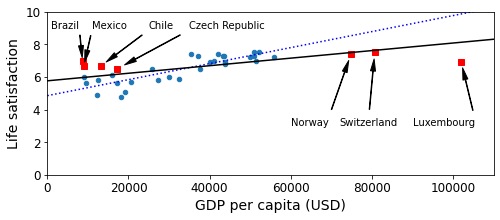

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))
sample_data.loc[list(position_text.keys())]

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

#save_fig('representative_training_data_scatterplot')
plt.show()

# sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
# plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}



### 1.5.3 낮은 품질의 데이터

훈련 데이터가 에러, 이상치, 잡음으로 가득하다면 머신러닝 시스템이 내재된 패턴을 찾기 어려움

훈련 데이터의 정제가 중요
- 일부 샘플의 이상치 명확한 경우 수동으로 수정 혹은 drop 
- 일부 샘플에 특성 몇개 빠져 있다면 NULL 값에 대한 특성 무시, 샘플 무시, 빠진 값 대체, 이 특성을 넣은 모델과 제외한 모델 따로 훈련 등 결정 필요 

### 1.5.4 관련 없는 특성
특성이 적고 관련 있는 특성이 충분해야 시스템 학습에 용이
훈련에 사용할 좋은 특성들을 찾는게 중요
**특성 공학**
- 특성 선택 : 훈련에 가장 유용한 특성 선택
- 특성 추출 : 특성을 결합해 더 유용한 특성 만듦 - 차원 축소 알고리즘
- 새 특성 수집



## 2 [나쁜 알고리즘]

### 1.5.5 훈련 데이터 과대적합 "Overfitting"
모델이 훈련 데이터에 너무 잘 맞지만 일반성이 떨어지는 경우

고차원의 다항 회귀 모델이 삶의 만족도 훈련 데이터에 크게 과대적합된 사례 -> 믿기 힘든 예측이 됨

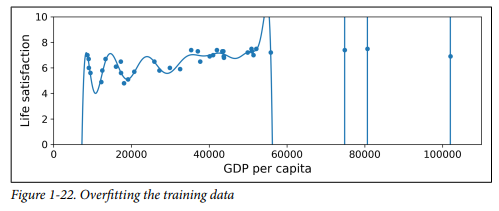

잡음의 양에 비해 모델이 너무 복잡할때 과대 적합이 일어남

- 파라미터 수가 적은 모델을 선택 
- 훈련 데이터에 있는 특성 수를 줄이거나, 모델에 제약을 가하여 단순화시킴
- 훈련 데이터를 더 많이 모음
- 훈련 데이터의 잡음을 줄임 (오류 데이터 수정과 이상치 제거) 

**규제**
모델을 단순하게 하고 과대적합의 위험을 감소 시키기 위해 모델에 제약을 가함

첫번째 모델에 규제 적용 

규제를 적용시 선현 모델의 기울기가 더 작아짐

동그라미(훈련데이터), 새로운 샘플(사각형)

학습하는 동안 규제의 양 : **하이퍼파라미터**가 결정

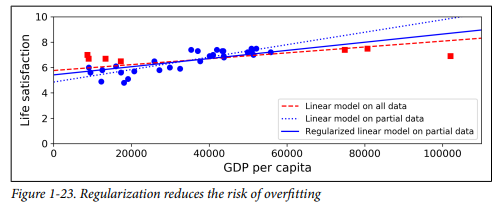

**하이퍼파라미터**

- 학습 알고리즘의 파라미터
- 학습 알고리즘으로 부터 영향을 받지 않으며, 훈련 전에 미리 지정됨, 훈련 동안에는 상수로 남아 있음
- 규제 파라미터를 매우 큰 값으로 지정하면 평편한 모델이 됨
- 좋은 모델 찾기 위한 하이퍼 파라미터 튜닝과정 필요




### 1.5.6 훈련 데이터 과소적합 "Underfitting"
모델이 너무 단순해서 데이터의 내재된 구조를 학습하지 못할 때 일어남
해결 방법 
- 모델 파라미터가 더 많은 강력한 모델 선택
- 특성 공학으로 좋은 특성 제공
- 모델의 제약 줄임 (규제 하이퍼파라미터 감소)


## 1.6 테스트와 검증
모델이 새로운 샘플에 얼마나 잘 일반화될지 아는 방법 : 새로운 샘플에 실제로 적용

이를 위해 데이터를 **훈련 세트**와 **테스트 세트** 두개로 나눔

모델 훈련 후 모델 테스트 
테스트 세트에서 모델을 평가해 오차에 대한 추정 값을 얻음
새로운 샘플에 대한 오류 비율 : **일반화 오차**

보통 데이터의 80%를 훈련에 사용하고 20%를 테스트용으로 떼어놓음, 데이터 셋이 클경우 1% 테스트 세트

### 1.6.1 하이퍼파라미터 튜닝과 모델 선택

모델 평가=> 테스트 세트를 사용

과대적합 피하기 위한 규제 적용, 하이퍼 파라미터 값은 어떻게 선택?

하이퍼 파라미터를 구하기 위해 일반화 오차를 테스트 세트에서 여러 번 측정시 테스트 세트에 최적화된 모델을 만듦 -> 일반화 오차 생김

**1. 홀드아웃 검증**으로 해결

훈련 세트의 일부를 떼어내 여러 후보 모델을 평가, 가장 좋은 하나를 선택

- 훈련 세트 : 다양한 하이퍼 파라미터로 여러 모델을 훈련
- 검증 세트 : 최상의 성능을 내는 모델과 하이퍼 파라미터를 선택
- 테스트 세트 : 단 한번의 최종 테스트

**2. 교차 검증(Cross Validation)** 으로 해결

검증 세트가 너무 작아 모델의 평가가 어렵거나 훈련 데이터에서 검증 세트로 너무 많은 양의 데이터를 뺏기지 않기 위해서 일반적으로 교차 검증 사용

검증 세트마다 나머지 데이터에서 훈련한 모델을 해당 검증 세트에서 평가
모든 모델의 평가를 평균
훨씬 정확한 성능 측정 가능


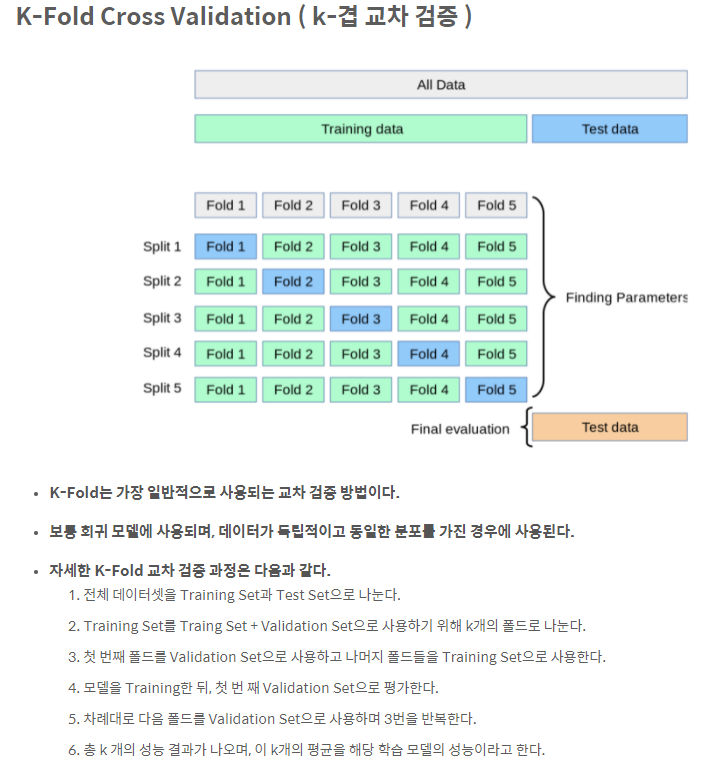

**데이터 불일치 문제**
검증 세트와 테스트 세트가 실전에서 기대하는 데이터를 가능한 한 잘 대표해야함 
웹에서 찍은 꽃 - 앱에서 찍은 꽃 불일치 문제
- 검증
- 테스트 세트에 사용되는 데이터와 훈련 세트 사이에 데이터 불일치 위험이 있을 때 **훈련-개발 세트** 사용

- 훈련 세트의 일부에서 모델을 훈련하고, 훈련 - 개발 세트와 검증 세트에서 평가

모델이 훈련 세트에서 잘 동작하지만 훈련 - 개발 세트에서 나쁜 성능을 낸다면 
훈련 세트에 과대 적합 되었을 가능성이 높음

훈련 세트와 훈련 - 개발 세트에서 모두 잘 동작하지만 개발 세트에서 성능이 나쁘다면 훈련 데이터와 검증 + 테스트 데이터 사이에 데이터 불일치가 있을 가능성이 높음

검증 + 테스트 데이터에 더 가깝게 되도록 훈련 데이터를 개선해야 함

#### 출처 
- 핸즈온 머신러닝 사이킷런, 케라스, 텐서플로 2를 활용한 머신러닝, 딥러닝 완벽 실무